# Как пользоваться блокнотом?
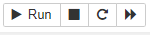

In [1]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


# Проект hypotez

Проект задумывался как "еще один парсер"

Для простоты объяснения я возьму пример из реальной жизни. Представьте, вы руководитель компании, специализируйщейся на рынке электроники и автоматики. Ваши разработчики создали или усовершенствовали некую электронную схему, и им необходим контроллер с определенными параметрами, несколько новых моделей транзисторов и что-то еще, что вы ни разу не закупали. Эту работу вы поручаете менеджеру по закупкам. 
     
Агент по закупкам получает запрос от исследовательского отдела найти на рынке компонент Y, с параметрами a,b,c. Типичный алгоритм действия:

- Поиск через поисковые движки (*Googlе*, *Bing*)
- Поиск в каталогах (*mouser*, *digikey*, *амазон*)
- Отбор позиций по параметрам
- Анализ полученных данных

*Иллюстрация:*

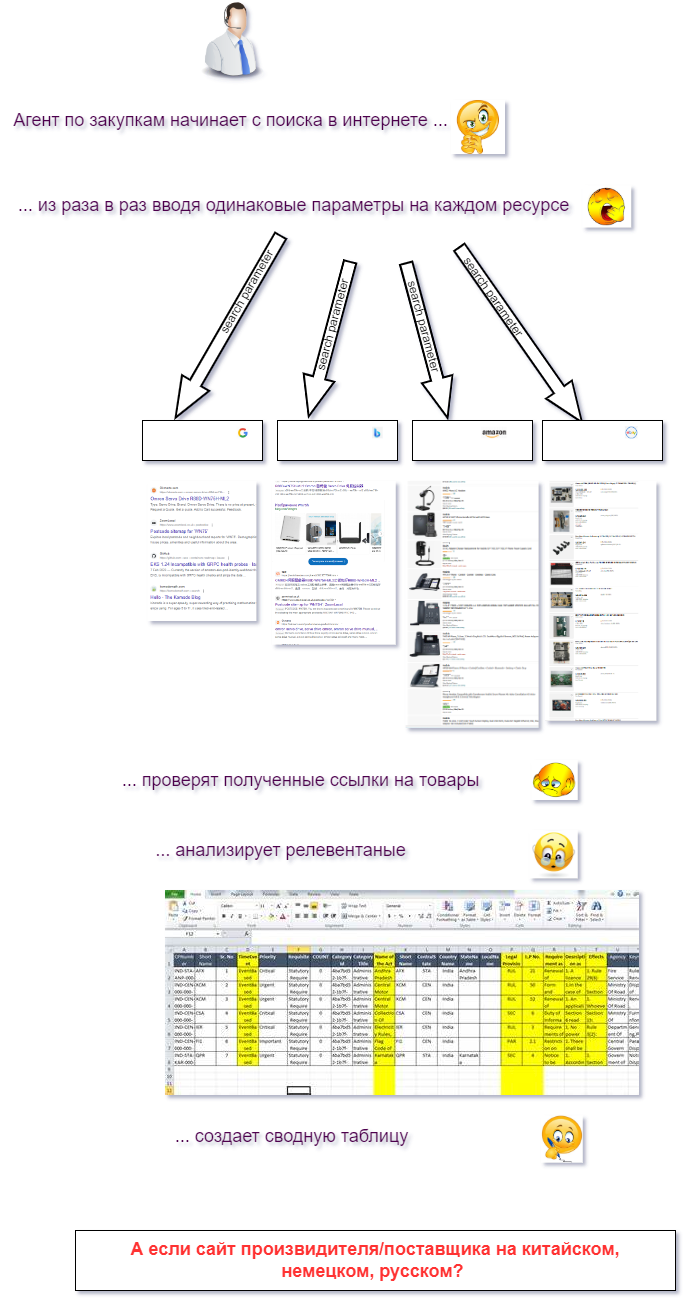

Я взял пример из области электроники и автоматики, т.к. она мне знакома и я могу оперировать понятиями, но описанное мной - типичная ситуация в любом предприятии, где предполагаются закупки компонентов, запчастей, всего, что можно назвать товаром. В концепции проекта я объединил эти сущности в класс **Product** (товар)<sup><font size='small'>1)<font></sup>. Надо понимать, что товаром может быть и услуга и инфомация, что угодно. Класс Product написан с учетом того, что параметры товара определяются самим товаром и являются лишь свойствами, которые присущи данному товару, а не завязаны жестко в коде.
Вы, как руководитель компании в такой динамичной области, как элеклтроника хотите быть в курсе последних трендов, Знать ассортимент различных производителей и поставщиков. И не получать спамом на почту, а как-нибудь поудобней.
Мы имеем две трудозатратные задачи: сбор и анализ. Обе можно автоматизировать, для этого я пишу проект с рабочим названием ***hypotez*** - парсер для сбора и анализа текстовых данных

In [7]:
from intro import toc, import_markdown_file
import IPython.core.magics.display
import_markdown_file('about_parser.md')

>  *Парсер - это помощник для бизнеса и магазинов. Он умеет искать и собирать информацию о товарах или услугах из интернета. Например, он может найти цены, описания и характеристики товаров. Это очень удобно для тех, кто хочет быстро сравнить цены или создать список товаров для продажи.*
>   *В финансах парсер - это инструмент, который помогает собирать и анализировать информацию о финансовых данных. Например, он может автоматически собирать котировки акций с биржи или извлекать данные о доходах и расходах компаний из отчетов. Это позволяет быстро получать нужную финансовую информацию для анализа и принятия решений.*
>   *В науке, парсер помогает автоматически анализировать и обрабатывать большие объемы данных из различных источников. Например, он может извлекать информацию из научных статей, исследовательских отчетов или баз данных. Это позволяет ученым быстрее обрабатывать и анализировать информацию, что помогает в проведении исследований и получении новых знаний.*
>   *В искусственном интеллекте (ИИ), парсер специализируется на анализе и понимании естественного языка. Он разбирает предложения или тексты, выделяя в них ключевые элементы, такие как слова, фразы и синтаксические структуры. Парсеры в ИИ используются, например, для перевода текстов с одного языка на другой, анализа сентимента, извлечения информации из текстов и других задач обработки естественного языка. Они позволяют компьютерам лучше понимать и взаимодействовать с человеческими текстами.*

*Вот несколько примеров задач, где парсеры могут быть полезны:*

* Мониторинг цен и анализ конкурентов:

 > Сбор данных о ценах на товары и услуги у конкурентов для анализа и принятия решений о ценообразовании.  
 Анализ изменений цен на товары в онлайн-магазинах для определения динамики рыночной конъюнктуры.
 
 
* Извлечение характеристик товаров:

> Автоматическое извлечение информации о характеристиках товаров (название, бренд, модель, цвет, размер и т.д.) из описаний и карточек товаров для создания каталогов.

* Мониторинг отзывов и обратной связи:

> Анализ отзывов клиентов о продуктах и услугах для выявления тенденций и потребностей рынка, а также для улучшения качества продукции и обслуживания.

* Парсинг новостных и социальных медиа данных:

> Сбор новостей и обсуждений из социальных сетей для анализа общественного мнения о продуктах, брендах или компании в целом.

* Анализ ассортимента и планирование инвентаризации:

> Сбор данных о наличии и описаниях товаров у различных поставщиков для оптимизации управления запасами и планирования инвентаризации.

* Мониторинг новых поступлений и акций:

> Анализ поступающих новинок и проводимых акций в сфере розничной торговли для оперативного реагирования и адаптации к изменениям рынка.

* Анализ конверсии и поведения клиентов на сайте:

> Извлечение данных о поведении пользователей на сайте (например, просмотренные страницы, временные интервалы, совершенные действия) для анализа эффективности интернет-магазина.


*Подробнее*: hypotez собирает у **поставщиков**<sup><font size='small'>1)<font></sup>&nbsp; актуальные данные о позициях (**товарах**<sup><font size='small'>2)<font></sup>&nbsp;) и обновляет каталог **клиента**<sup><font size='small'>3)<font></sup>&nbsp;. 

<sup><font size='small'>1)<font></sup> ***Поставщик*** - Любой источник информации о **товаре**. Поставщиком может быть таблица (файл Excel, csv, Google таблицы), API или парсинг страниц HTML. В коде он определен классом **Supplier**. Supplier запускет **сценарий**<sup><font size='small'>4)<font></sup>, собирает ответ и отдает cполученные данные сущности **товер**

<sup><font size='small'>2)<font></sup> ***Товар*** - Полученные запрошенные данные. В коде он определен классом **Product**.<br>
&ensp;Товаром может быть материальный объект, биржевая, спортивная или научная информация. hypotez умеет мониторить изменения параметров товара.<br> &ensp;Товар (*Product*) получает сырые данные от поставщика (*Supplier*), форматирует их и отдает опеделенному **клиенту**.

<sup><font size='small'>3)<font></sup> ***Клиент*** - получатель информации о тевре. В каестве клиента может выступать база данных, <br>
&ensp;таблица (файл Excel, csv, Google таблицы) или email.

<sup><font size='small'>3)<font></sup> ***Сценарий*** - файл JSON, в которм записана последователь

*Пример автоматизации с помощью hypotez*: 
----
 
hypotez создается для автоматизации рутинных действий показанных в примере<br>
Программа получает на вход сценарий испонения, а результат отадет в заданной форме клиенту.

*Блоксхема:*

![блоксхема hypotez](../doxygen/_images/hypotez.drawio.png)

In [3]:
%%markdown
# Hello

# Hello


In [4]:

from IPython.display import display, Javascript

# см. https://github.com/n8henrie/jupyter-black/issues/1

js_code = '''
var cell = Jupyter.notebook.insert_cell_above('markdown');
cell.set_text('Это новая ячейка с Markdown-разметкой.');'''

display(Javascript(js_code))

<IPython.core.display.Javascript object>

Это новая ячейка с Markdown-разметкой.

#### Директории:
- bin - содержит бинарные файлы, такие, как вебдрайвер (удобно работать с разными версиями)
- docs - документация к проекту
- src - файлы программы

## Содержание. 

In [5]:
toc('intro')

In [6]:
from IPython.display import display, HTML, Javascript

# Добавляею HTML-код с JavaScript, который будет прокручивать страницу вверх
scroll_up_js = """
<script>
function scroll_up() {
    alert()
    window.scrollTo({top: 0, behavior: 'smooth'});
    //window.scrollTo(0, 0);
    
}
//scroll_up();
</script>
"""

# Добавляю кнопку для прокрутки страницы вверх
scroll_button = """
<button onclick="scroll_up()" style="position: fixed; bottom: 20px; right: 20px; z-index: 99;">Наверх</button>
"""

scroll_button = """
<button onclick="scroll_up()" style="">Наверх</button>
"""

# Отображаю HTML-код
#display(HTML(scroll_up_js + scroll_button + start_script))
#print(scroll_up_js+ scroll_button)
display(HTML(scroll_up_js + scroll_button))
#display(HTML(scroll_button))